In [15]:
import numpy as np
from Encapsulation import *
from Linear import *
from NonLinear import *
from Loss import *

In [16]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")

In [17]:
print(X_train.shape)

(7291, 256)


In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
def normalize(data_x):
    x_min=np.min(data_x)
    x_max=np.max(data_x)
    return (data_x-x_min)/(1.0*(x_max-x_min))

In [20]:
X_train_norm=normalize(X_train)
X_test_norm=normalize(X_test)


In [23]:
encoder = [
    Linear(256,64),
    Tanh(),
]
decoder = [
    Linear(64,256),
    Sigmode()
]

network_usps=Sequential(encoder+decoder)
optim_usps=Optim(network_usps,BCELoss(),eps=1e-3)
losses=optim_usps.sgd(X_train,X_train,10,100)

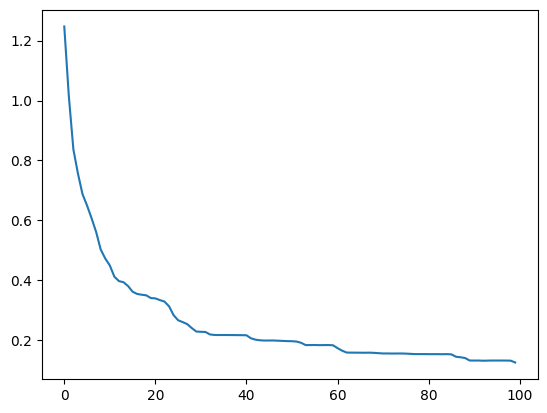

In [24]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(losses)),losses)